# Stock Price Prediction Regression Models

## Importing Necessary Libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [109]:
dataset = pd.read_csv("NFLX.csv")

## Exploratory Data Analysis

### Data Overview

We use `.head()`, `.info()`, and `.describe()` to check:
- The number of rows and columns
- Data types (numeric, object, etc.)
- Basic statistics like mean, min, max, standard deviation

This gives us a sense of the data's scale and range, and helps spot any obvious errors or anomalies.

In [110]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.00,267.90,250.03,254.26,254.26,11896100
1,2018-02-06,247.70,266.70,245.00,265.72,265.72,12595800
2,2018-02-07,266.58,272.45,264.33,264.56,264.56,8981500
3,2018-02-08,267.08,267.62,250.00,250.10,250.10,9306700
4,2018-02-09,253.85,255.80,236.11,249.47,249.47,16906900


In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [112]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.00,1009.00,1009.00,1009.00,1009.00,1009.00
mean,419.06,425.32,412.37,419.00,419.00,7570685.03
std,108.54,109.26,107.56,108.29,108.29,5465535.23
min,233.92,250.65,231.23,233.88,233.88,1144000.00
25%,331.49,336.30,326.00,331.62,331.62,4091900.00
50%,377.77,383.01,370.88,378.67,378.67,5934500.00
75%,509.13,515.63,502.53,509.08,509.08,9322400.00
max,692.35,700.99,686.09,691.69,691.69,58904300.00


In [113]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Checking for null values

In [114]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Date Handling

We separate the 'Date' column into individual columns for year, month, and day, and set the date as the index. 

In [115]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

display(dataset)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2018-02-05,262.00,267.90,250.03,254.26,254.26,11896100,2018,2,5
1,2018-02-06,247.70,266.70,245.00,265.72,265.72,12595800,2018,2,6
2,2018-02-07,266.58,272.45,264.33,264.56,264.56,8981500,2018,2,7
3,2018-02-08,267.08,267.62,250.00,250.10,250.10,9306700,2018,2,8
4,2018-02-09,253.85,255.80,236.11,249.47,249.47,16906900,2018,2,9
...,...,...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.97,427.70,398.20,427.14,427.14,20047500,2022,1,31
1005,2022-02-01,432.96,458.48,425.54,457.13,457.13,22542300,2022,2,1
1006,2022-02-02,448.25,451.98,426.48,429.48,429.48,14346000,2022,2,2
1007,2022-02-03,421.44,429.26,404.28,405.60,405.60,9905200,2022,2,3


### Trend Over Time

We plot the Closing Price vs Date to observe how the stock has performed over time.

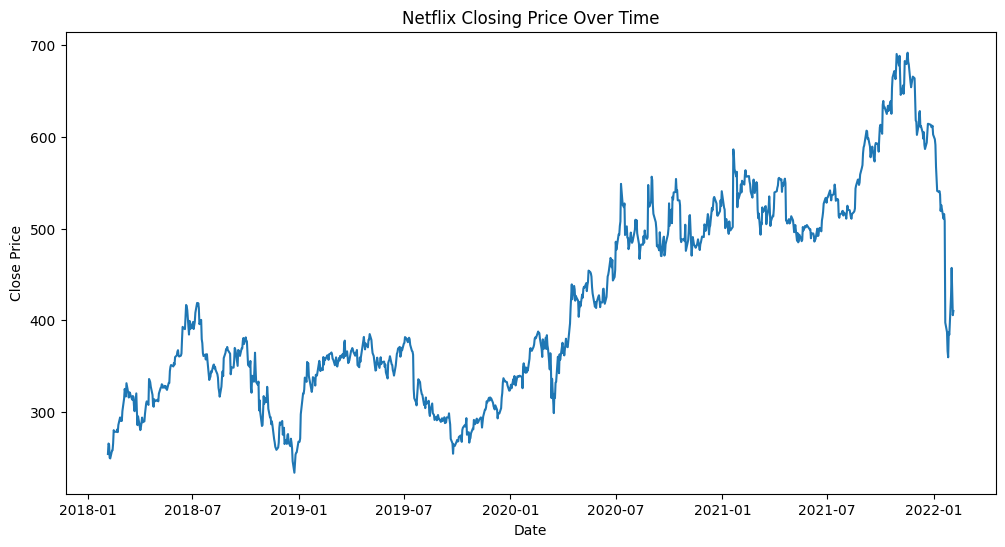

In [116]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset, x='Date', y='Close')
plt.title("Netflix Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

### Correlation Heat Map

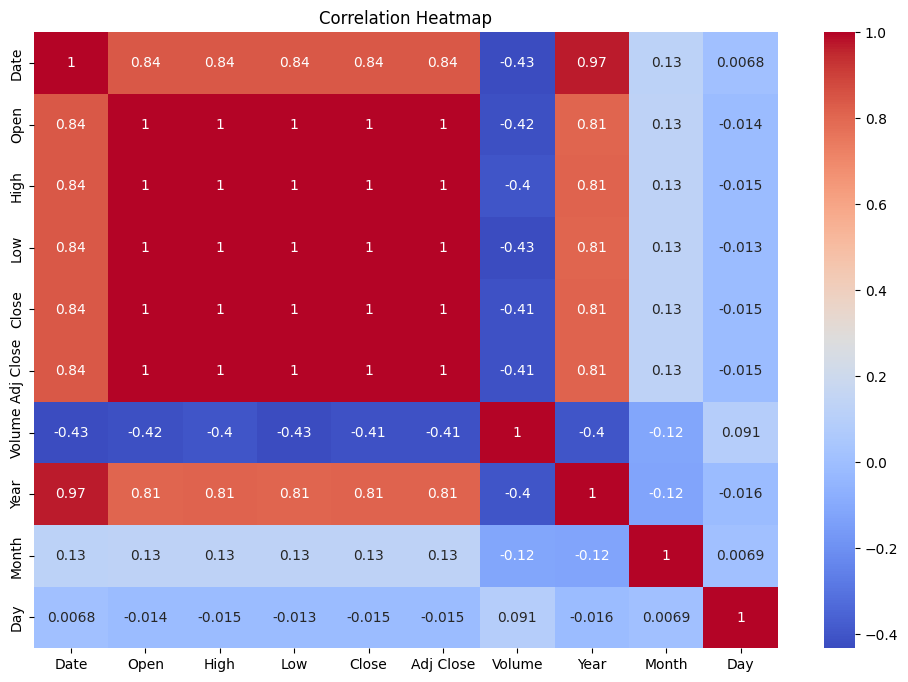

In [117]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Dropping NaN Values

In [118]:
dataset.dropna(inplace=True)

### Dropping Irrelevant Features

In [119]:
dataset.drop('Adj Close', axis=1, inplace=True)

## Defining Features(X) and Target(y)

In [141]:
features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']
X = dataset[features].values
y = dataset['Close'].values

## Splitting Data into Training and Test Set

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Building a Linear Regression Model

In [122]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

### Comparing Linear Model Test Set with Predicted Values

In [143]:
lin_y_pred = lin_reg.predict(X_test)

In [124]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': lin_y_pred
})

print(comparison_df.head(10))

   Actual  Predicted
0  553.73     554.07
1  379.06     379.93
2  361.40     360.11
3  281.86     283.71
4  261.43     259.96
5  434.48     434.97
6  265.72     260.96
7  518.02     518.95
8  315.93     315.29
9  348.87     345.51


## Building a Decision Tree Model

In [125]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Comparing Decision Tree Model Test Set with Predicted Values

In [126]:
tree_y_pred = tree_reg.predict(X_test)

In [127]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': tree_y_pred
})

print(comparison_df.head(10))

   Actual  Predicted
0  553.73     555.31
1  379.06     379.50
2  361.40     359.97
3  281.86     284.25
4  261.43     264.75
5  434.48     436.53
6  265.72     254.26
7  518.02     509.11
8  315.93     312.49
9  348.87     345.61


## Building a Random Forest Model

In [128]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10, random_state=0)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

### Comparing Random Forest Model Test Set with Predicted Values

In [129]:
forest_y_pred = forest_reg.predict(X_test)

In [130]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': forest_y_pred
})

print(comparison_df.head(10))

   Actual  Predicted
0  553.73     551.57
1  379.06     379.22
2  361.40     362.44
3  281.86     282.96
4  261.43     258.92
5  434.48     434.05
6  265.72     254.18
7  518.02     516.62
8  315.93     313.55
9  348.87     347.25


## Visualizing Linear Regression Model Test Set Results 

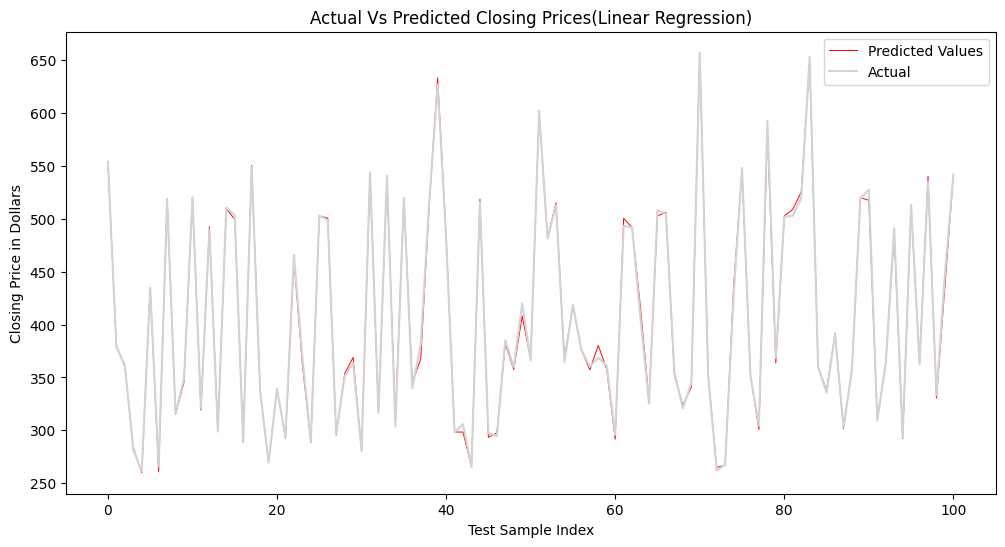

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(lin_y_pred, label='Predicted Values', color='red', linewidth=0.7)
plt.plot(y_test, label='Actual', color='lightgrey')
plt.title('Actual Vs Predicted Closing Prices(Linear Regression)')
plt.xlabel('Test Sample Index')
plt.ylabel('Closing Price in Dollars')
plt.legend()
plt.show()

### Residual Plot
As the line plot of the actual dataset closely overlaps with the predicted values, a residual plot provides a clearer visualization of the differences between the actual and predicted closing prices.

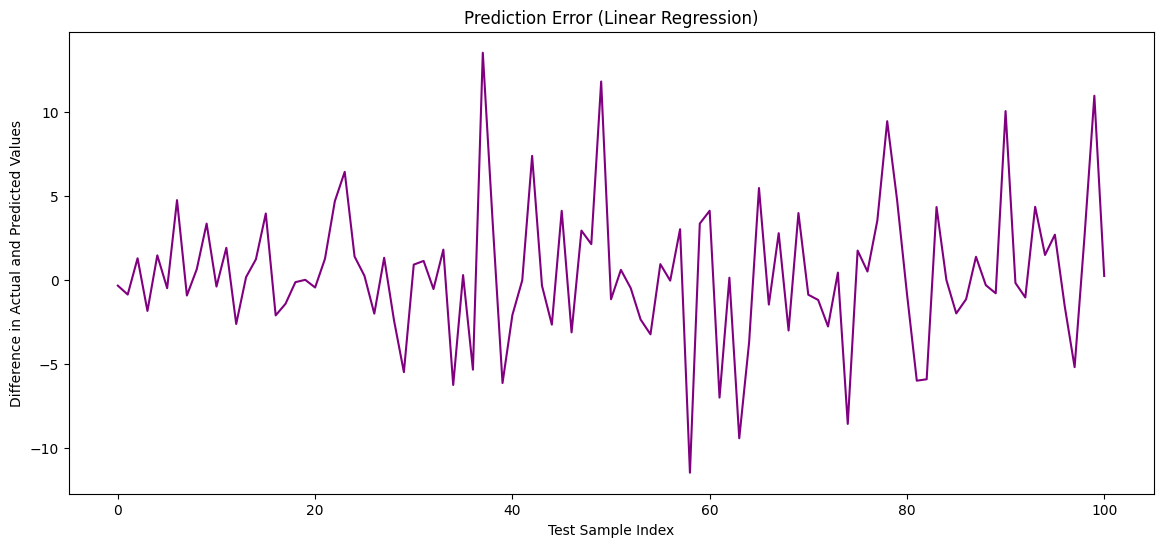

In [132]:
err = y_test - lin_y_pred

plt.figure(figsize=(14, 6))
plt.plot(err, color='purple')
plt.title("Prediction Error (Linear Regression)")
plt.xlabel("Test Sample Index")
plt.ylabel("Difference in Actual and Predicted Values")
plt.show()

## Visualizing Decision Tree Model Test Set Results 

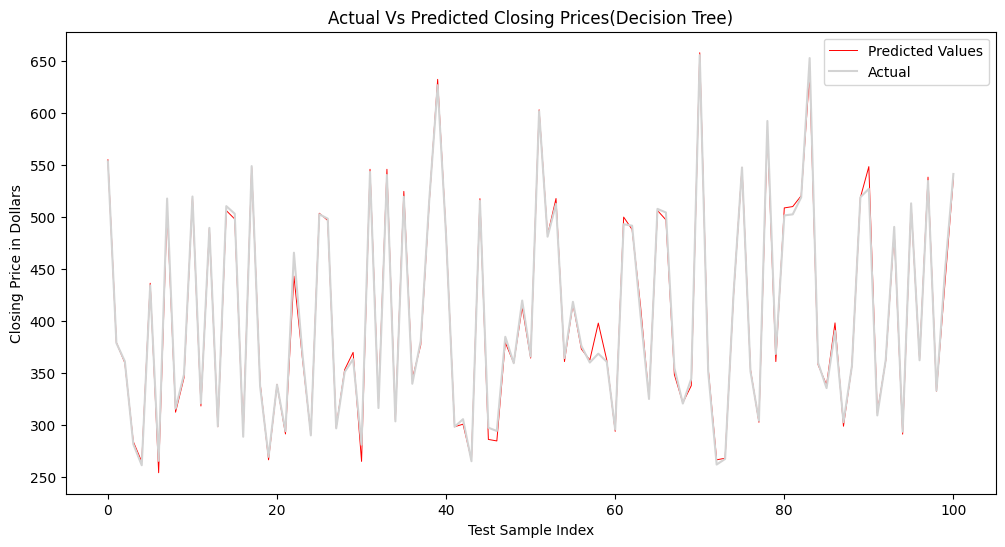

In [133]:
plt.figure(figsize=(12, 6))
plt.plot(tree_y_pred, label='Predicted Values', color='red', linewidth=0.7)
plt.plot(y_test, label='Actual', color='lightgrey')
plt.title('Actual Vs Predicted Closing Prices(Decision Tree)')
plt.xlabel('Test Sample Index')
plt.ylabel('Closing Price in Dollars')
plt.legend()
plt.show()

### Residual Plot

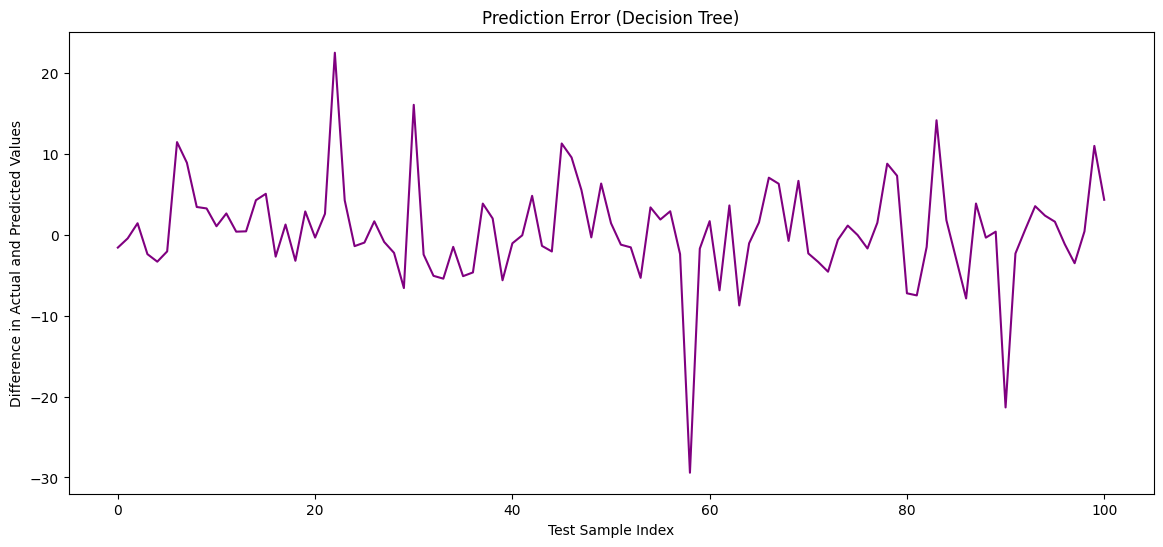

In [134]:
err = y_test - tree_y_pred

plt.figure(figsize=(14, 6))
plt.plot(err, color='purple')
plt.title("Prediction Error (Decision Tree)")
plt.xlabel("Test Sample Index")
plt.ylabel("Difference in Actual and Predicted Values")
plt.show()

## Visualizing Random Forest Model Test Set Results

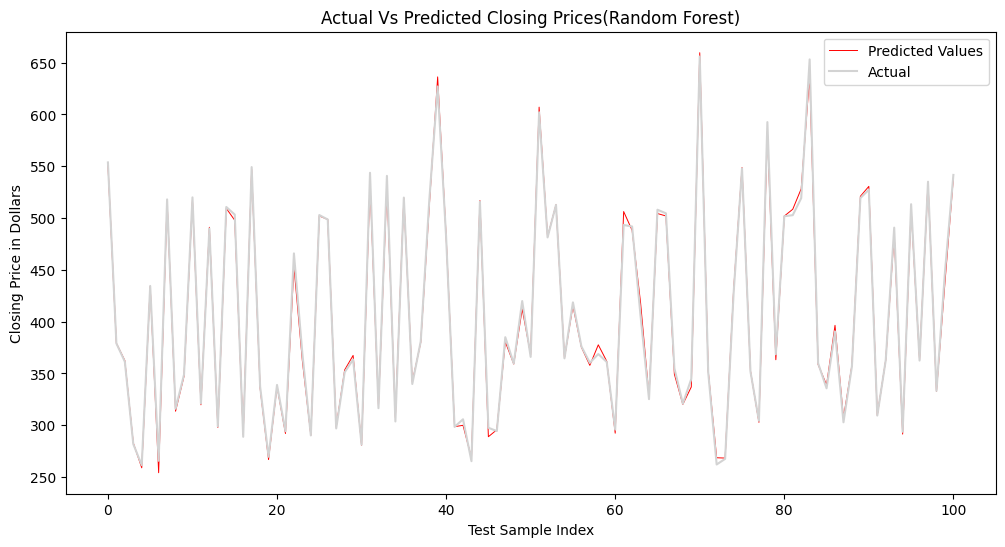

In [135]:
plt.figure(figsize=(12, 6))
plt.plot(forest_y_pred, label='Predicted Values', color='red', linewidth=0.7)
plt.plot(y_test, label='Actual', color='lightgrey')
plt.title('Actual Vs Predicted Closing Prices(Random Forest)')
plt.xlabel('Test Sample Index')
plt.ylabel('Closing Price in Dollars')
plt.legend()
plt.show()

### Residual Plot

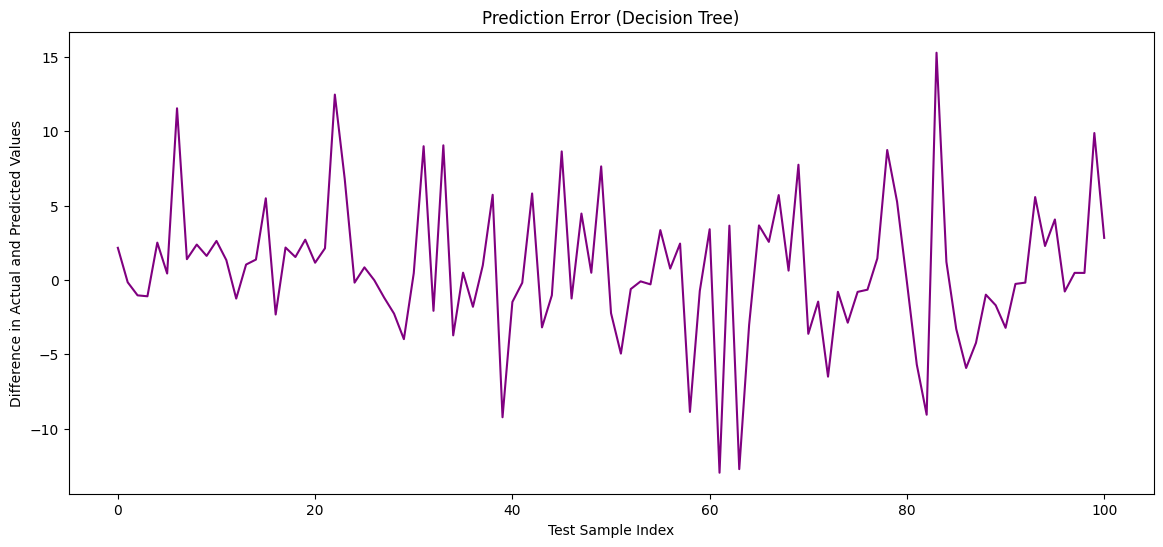

In [136]:
err = y_test - forest_y_pred

plt.figure(figsize=(14, 6))
plt.plot(err, color='purple')
plt.title("Prediction Error (Decision Tree)")
plt.xlabel("Test Sample Index")
plt.ylabel("Difference in Actual and Predicted Values")
plt.show()

## Evaluating All Models

### Linear Regression Model

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_rmse = (mean_squared_error(y_test, lin_y_pred)) ** 0.5
lin_r2 = r2_score(y_test, lin_y_pred)

print(f'MAE: {lin_mae}')
print(f'RMSE: {lin_rmse}')
print(f'R-Squared Score: {lin_r2}')

MAE: 2.9366456121887
RMSE: 4.154040680308715
R-Squared Score: 0.9983608540116083


### Decision Tree Model

In [138]:
tree_mae = mean_absolute_error(y_test, tree_y_pred)
tree_rmse = (mean_squared_error(y_test, tree_y_pred)) ** 0.5
tree_r2 = r2_score(y_test, tree_y_pred)

print(f'MAE: {tree_mae}')
print(f'RMSE: {tree_rmse}')
print(f'R-Squared Score: {tree_r2}')

MAE: 4.223267128712871
RMSE: 6.359622760844308
R-Squared Score: 0.9961581637091604


### Random Forest Model

In [139]:
forest_mae = mean_absolute_error(y_test, forest_y_pred)
forest_rmse = (mean_squared_error(y_test, forest_y_pred)) ** 0.5
forest_r2 = r2_score(y_test, forest_y_pred)

print(f'MAE: {forest_mae}')
print(f'RMSE: {forest_rmse}')
print(f'R-Squared Score: {forest_r2}')

MAE: 3.4056246574257516
RMSE: 4.791983810253932
R-Squared Score: 0.9978187430457838


## Dumping Best model using joblib

In [142]:
import joblib
joblib.dump(lin_reg, 'refined_model.joblib')

['refined_model.joblib']